# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# url for Open Weather Map API
url = "http://api.openweathermap.org/data/2.5/weather?"
params = {
    "appid":weather_api_key,
    "units":"imperial"    
}

# city container list
city_data = []

In [4]:
# Print Log of Each City
print("---------------------------------")
print(" ")
print("     START:  CITY WEATHER CHECK ")
print(" ")
print("---------------------------------")

# counter list
set_counter = 1
record_counter = 1

for city in cities:
    params["q"] = city
    response = requests.get(url, params=params)
    # when looping through, skip if city isn't found
    if response.ok == False:
        print(" City not found.   Skipping...")
        time.sleep(1)
        pass
    else:    
        response_json = response.json()
        weather_dict = {
            "City":response_json["name"], 
            "Country":response_json["sys"]["country"],
            "Date":response_json["dt"],
            "Latitude":response_json["coord"]["lat"],
            "Longitude":response_json["coord"]["lon"],
            "Cloudiness":response_json["clouds"]["all"],
            "Humidity":response_json["main"]["humidity"],
            "Max Temp":response_json["main"]["temp_max"],
            "Wind Speed":response_json["wind"]["speed"]
        }
        city_data.append(weather_dict)
        print(f"Processing Record {record_counter} of Set {set_counter} | {weather_dict['City']}")
        record_counter += 1

        #utilize the counter
        if record_counter % 50 == 0:
            set_counter += 1
            record_counter = 1

print("---------------------------------")
print(" ")
print("     END:  CITY WEATHER CHECK ")
print(" ")
print("---------------------------------")

---------------------------------
 
     START:  CITY WEATHER CHECK 
 
---------------------------------
Processing Record 1 of Set 1 | Wagar
Processing Record 2 of Set 1 | Busselton
 City not found.   Skipping...
 City not found.   Skipping...
Processing Record 3 of Set 1 | Russell
Processing Record 4 of Set 1 | Kathu
Processing Record 5 of Set 1 | Palu
 City not found.   Skipping...
Processing Record 6 of Set 1 | Mar del Plata
Processing Record 7 of Set 1 | Vaini
Processing Record 8 of Set 1 | Jamestown
Processing Record 9 of Set 1 | Burns Lake
Processing Record 10 of Set 1 | Butaritari
Processing Record 11 of Set 1 | George Town
Processing Record 12 of Set 1 | High Level
Processing Record 13 of Set 1 | Cape Town
Processing Record 14 of Set 1 | Mooresville
Processing Record 15 of Set 1 | Vyshkov
Processing Record 16 of Set 1 | Hermanus
Processing Record 17 of Set 1 | Yar-Sale
Processing Record 18 of Set 1 | Hobart
Processing Record 19 of Set 1 | Khatanga
Processing Record 20 of Set 1

Processing Record 39 of Set 4 | Iberia
Processing Record 40 of Set 4 | Ostrovnoy
Processing Record 41 of Set 4 | Provideniya
Processing Record 42 of Set 4 | Qaqortoq
Processing Record 43 of Set 4 | Zaysan
Processing Record 44 of Set 4 | Qaanaaq
Processing Record 45 of Set 4 | Tuatapere
Processing Record 46 of Set 4 | Ambon
Processing Record 47 of Set 4 | Khovd
Processing Record 48 of Set 4 | Harper
Processing Record 49 of Set 4 | Lompoc
Processing Record 1 of Set 5 | Smithers
Processing Record 2 of Set 5 | Evensk
Processing Record 3 of Set 5 | Constitucion
Processing Record 4 of Set 5 | Maragogi
 City not found.   Skipping...
Processing Record 5 of Set 5 | San Juan
Processing Record 6 of Set 5 | Sandur
Processing Record 7 of Set 5 | Sambava
Processing Record 8 of Set 5 | Manavalakurichi
Processing Record 9 of Set 5 | Taseyevo
Processing Record 10 of Set 5 | Nanchang
Processing Record 11 of Set 5 | Anking
 City not found.   Skipping...
Processing Record 12 of Set 5 | Norman Wells
Proces

Processing Record 31 of Set 8 | Bom Jesus
Processing Record 32 of Set 8 | Pisco
Processing Record 33 of Set 8 | Agadez
Processing Record 34 of Set 8 | Iquique
Processing Record 35 of Set 8 | Kieta
 City not found.   Skipping...
Processing Record 36 of Set 8 | Bridlington
 City not found.   Skipping...
Processing Record 37 of Set 8 | Sinj
Processing Record 38 of Set 8 | Havre-Saint-Pierre
 City not found.   Skipping...
Processing Record 39 of Set 8 | Ocos
Processing Record 40 of Set 8 | Daru
Processing Record 41 of Set 8 | Cuamba
Processing Record 42 of Set 8 | Alyangula
Processing Record 43 of Set 8 | Cayenne
Processing Record 44 of Set 8 | Kabalo
Processing Record 45 of Set 8 | Owando
Processing Record 46 of Set 8 | Quimper
Processing Record 47 of Set 8 | Topeka
Processing Record 48 of Set 8 | Cascais
Processing Record 49 of Set 8 | 'Ahuimanu
Processing Record 1 of Set 9 | Comodoro Rivadavia
 City not found.   Skipping...
Processing Record 2 of Set 9 | Jalu
Processing Record 3 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Dataframe
city_pd = pd.DataFrame(city_data)

lat = city_pd["Latitude"]
maxtemp = city_pd["Max Temp"]
hum = city_pd["Humidity"]
winds = city_pd["Wind Speed"]
clouds = city_pd["Cloudiness"]

# Display Dataframe
city_pd.to_csv(output_data_file, index_label="City_ID")
city_pd.head()

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temp,Wind Speed
0,Wagar,SD,1579318045,16.15,36.20,21,29,63.28,10.80
1,Busselton,AU,1579317821,-33.65,115.33,0,22,78.01,10.47
2,Russell,US,1579317924,32.35,-85.20,75,32,55.00,9.17
3,Kathu,TH,1579318047,7.92,98.33,0,66,84.20,9.17
4,Palu,ID,1579317794,-0.89,119.87,38,47,85.32,3.18


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

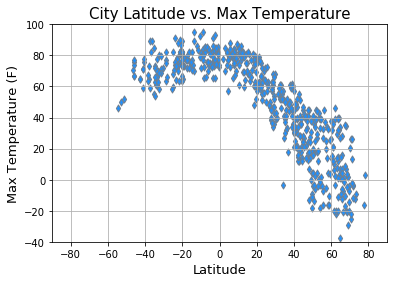

In [6]:
plt.scatter(lat,
            maxtemp,
            marker="d",
            facecolor="dodgerblue",
            edgecolor="slategrey",
            s= 25,
            alpha=0.99)
plt.title("City Latitude vs. Max Temperature", fontsize=15);
plt.xlabel("Latitude", fontsize=13);
plt.ylabel("Max Temperature (F)", fontsize=13);
plt.grid();
plt.xlim(-90, 90);
plt.ylim(-40, 100);
plt.figsize=(20,20);
plt.savefig("Plot_Latitude_v_Temp.png");
plt.show()

#### Latitude vs. Humidity Plot

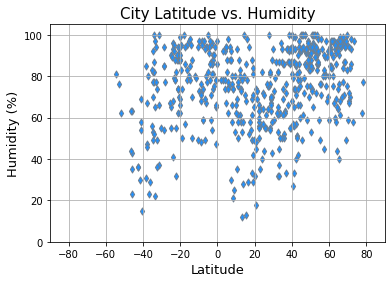

In [7]:
plt.scatter(lat,
            hum,
            marker="d",
            facecolor="dodgerblue",
            edgecolor="slategrey",
            s= 25,
            alpha=0.99)
plt.title("City Latitude vs. Humidity", fontsize=15);
plt.xlabel("Latitude", fontsize=13);
plt.ylabel("Humidity (%)", fontsize=13);
plt.grid();
plt.xlim(-90, 90);
plt.ylim(-0, 105);
plt.figsize=(20,20);
plt.savefig("Plot_Latitude_v_Humidity.png");
plt.show()

#### Latitude vs. Cloudiness Plot

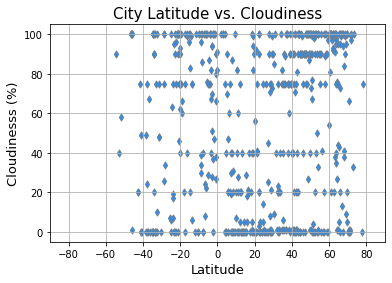

In [8]:
plt.scatter(lat,
            clouds,
            marker="d",
            facecolor="dodgerblue",
            edgecolor="slategrey",
            s= 25, 
            alpha=0.99)
plt.title("City Latitude vs. Cloudiness", fontsize=15);
plt.xlabel("Latitude",fontsize=13);
plt.ylabel("Cloudinesss (%)",fontsize=13);
plt.grid();
plt.xlim(-90, 90);
plt.ylim(-5, 105);
plt.figsize=(20,20);
plt.savefig("Plot_Latitude_v_Cloudiness.png");
plt.show()

#### Latitude vs. Wind Speed Plot

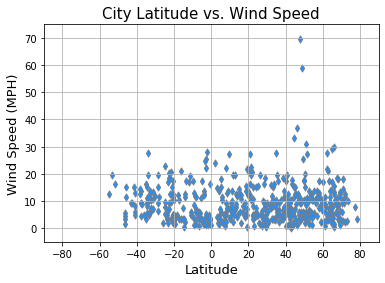

In [9]:
plt.scatter(lat,
            winds,
            marker="d",
            facecolor="dodgerblue",
            edgecolor="slategrey",
            s= 25, 
            alpha=0.99)
plt.title("City Latitude vs. Wind Speed", fontsize=15);
plt.xlabel("Latitude", fontsize=13);
plt.ylabel("Wind Speed (MPH)", fontsize=13);
plt.grid();
plt.xlim(-90, 90);
plt.ylim(-5, 75);
plt.figsize=(20,20);
plt.savefig("Plot_Latitude_v_WindSpeed.png");
plt.show()

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_pd.loc[city_pd["Latitude"]>0]
Southern_hemisphere = city_pd.loc[city_pd["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

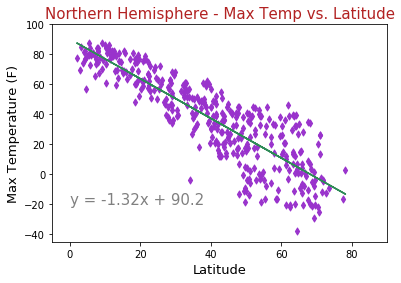

In [72]:
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,
            marker="d",
            facecolors="darkorchid",
            edgecolors="darkorchid",
            s=25,
            alpha=0.99)
plt.plot(x_values,regress_values,"seagreen")

plt.xlim(-5, 90);
plt.ylim(-45, 100);

plt.annotate(line_eq,(0,-20),fontsize=15,color="grey")

plt.title("Northern Hemisphere - Max Temp vs. Latitude", fontsize=15, color="firebrick")
plt.ylabel("Max Temperature (F)", fontsize=13)
plt.xlabel("Latitude", fontsize=13)

plt.savefig("N_Hemisphere_Max_Temp_v_Latitude.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49961187693877596


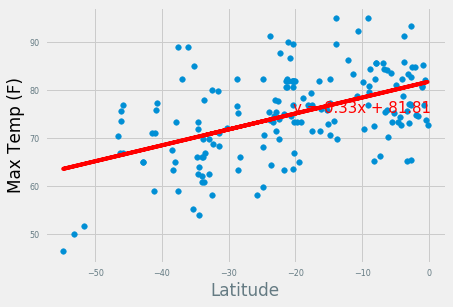

In [89]:
plt.style.use('fivethirtyeight')
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)", color="black")
plt.show(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.35261120411107827


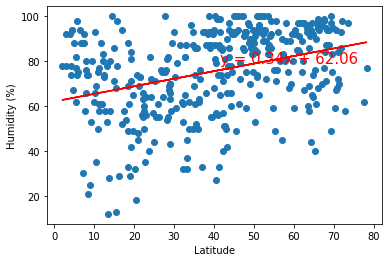

In [39]:
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
plt.show(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.41781289823022977


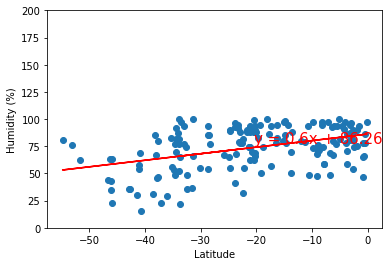

None


In [26]:
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
plt.show(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.32929410771643386


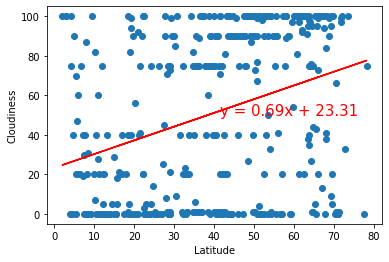

None


In [27]:
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.show(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.19887907495630727


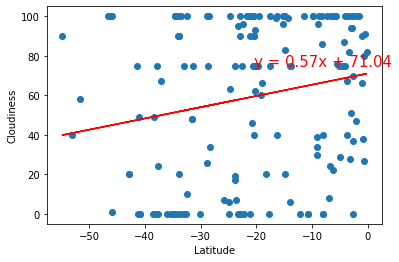

None


In [28]:
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.show(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.030478722949290743


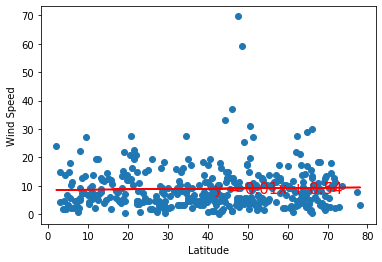

None


In [29]:
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
plt.show(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.19965184984196033


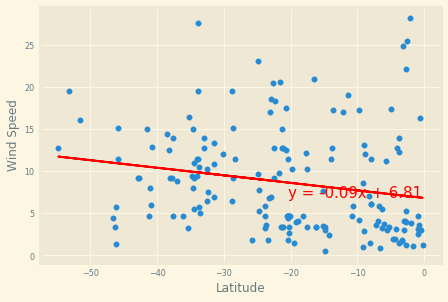

In [88]:
plt.style.use('Solarize_Light2')
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
plt.show(linear_reg_plot(x_values,y_values))